In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
data_2021 = pd.read_excel(r"C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\dataset\Agro products_ 2018 to 2022.xlsx", sheet_name='2021')

data_2021

,Sail Date.,QTY.(KGS),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,March
0,2021-01-01 00:00:00,40496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 00:00:00,23300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-01 00:00:00,28000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-01 00:00:00,45828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-01 00:00:00,43924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8101,31-10-2021,38400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8102,31-10-2021,57600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8103,31-10-2021,50096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8104,31-10-2021,49160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data_2021 = data_2021.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4',	'Unnamed: 5',	'Unnamed: 6',	'Unnamed: 7',	'Unnamed: 8',	'Unnamed: 9' ])

In [24]:
data_2021 = data_2021.drop(columns=['March'])


In [25]:
data_2021

,Sail Date.,QTY.(KGS)
0,2021-01-01 00:00:00,40496
1,2021-01-01 00:00:00,23300
2,2021-01-01 00:00:00,28000
3,2021-01-01 00:00:00,45828
4,2021-01-01 00:00:00,43924
...,...,...
8101,31-10-2021,38400
8102,31-10-2021,57600
8103,31-10-2021,50096
8104,31-10-2021,49160


In [26]:
data_2021.shape

(8106, 2)

In [27]:
if pd.api.types.is_datetime64_any_dtype(data_2021['Sail Date.']):
    # Sort the DataFrame based on the 'Sail Date' column
     data_2021.sort_values(by='Sail Date.')
data_2021

,Sail Date.,QTY.(KGS)
0,2021-01-01 00:00:00,40496
1,2021-01-01 00:00:00,23300
2,2021-01-01 00:00:00,28000
3,2021-01-01 00:00:00,45828
4,2021-01-01 00:00:00,43924
...,...,...
8101,31-10-2021,38400
8102,31-10-2021,57600
8103,31-10-2021,50096
8104,31-10-2021,49160


In [28]:
data_2021['Sail Date.'] = pd.to_datetime(data_2021['Sail Date.'])

g=data_2021.sort_values(by="Sail Date.")

In [29]:
g

,Sail Date.,QTY.(KGS)
0,2021-01-01,40496
25,2021-01-01,21400
24,2021-01-01,9718
23,2021-01-01,25507
22,2021-01-01,11400
...,...,...
7979,2021-12-30,46000
7980,2021-12-30,84000
7981,2021-12-30,9576
7982,2021-12-30,22297


In [30]:
data_2021

,Sail Date.,QTY.(KGS)
0,2021-01-01,40496
1,2021-01-01,23300
2,2021-01-01,28000
3,2021-01-01,45828
4,2021-01-01,43924
...,...,...
8101,2021-10-31,38400
8102,2021-10-31,57600
8103,2021-10-31,50096
8104,2021-10-31,49160


In [31]:
data_2021['Sail Date.'] = pd.to_datetime(data_2021['Sail Date.'])

# Group by 'Sail Date' and sum the 'QTY.(KGS)' column
daily_sales= data_2021.groupby(data_2021['Sail Date.'].dt.date)['QTY.(KGS)'].sum().reset_index()

# Display the resulting table
print(daily_sales)

     Sail Date.  QTY.(KGS)
0    2021-01-01    1244317
1    2021-01-02    1499299
2    2021-01-03    1115398
3    2021-01-04     213313
4    2021-01-05    1020265
..          ...        ...
268  2021-12-24    1224472
269  2021-12-25    1004549
270  2021-12-27    2648166
271  2021-12-29     966369
272  2021-12-30     178873

[273 rows x 2 columns]


In [32]:

daily_sales.to_csv(r'C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\dataset\clean\c_data_21.csv', index=False)

In [33]:
max_value = daily_sales['QTY.(KGS)'].max()

print("Maximum value in 'QTY.(KGS)':", max_value)

min_value = daily_sales['QTY.(KGS)'].min()

print("Minimum value in 'QTY.(KGS)':", min_value)

ghh= max_value - min_value
print(ghh," is the difference")

Maximum value in 'QTY.(KGS)': 4125467
Minimum value in 'QTY.(KGS)': 3010
4122457  is the difference


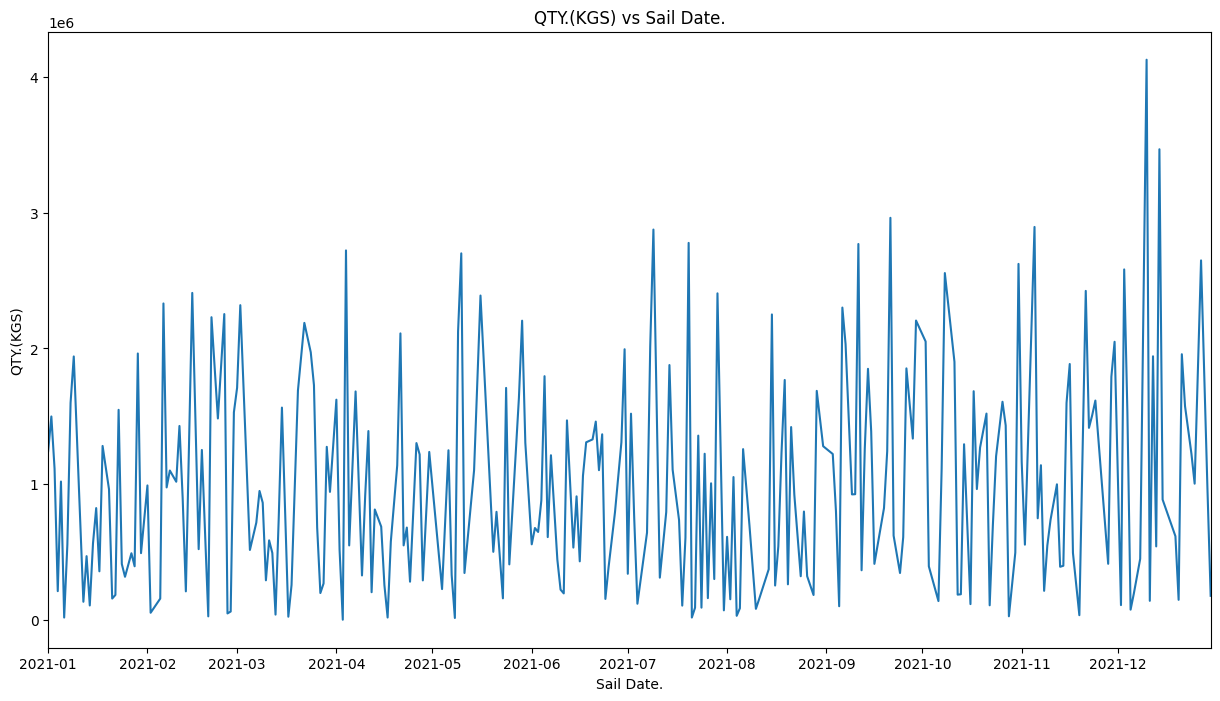

In [34]:

plt.figure(figsize=(15,8))
plt.plot(daily_sales['Sail Date.'], daily_sales['QTY.(KGS)'])
plt.xlabel('Sail Date.')
plt.ylabel('QTY.(KGS)')
plt.title('QTY.(KGS) vs Sail Date.')
plt.xlim(daily_sales['Sail Date.'].min(), daily_sales['Sail Date.'].max())
plt.show()

In [35]:
duplicate_rows = data_2021[data_2021.duplicated()]

# Display the number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 1012


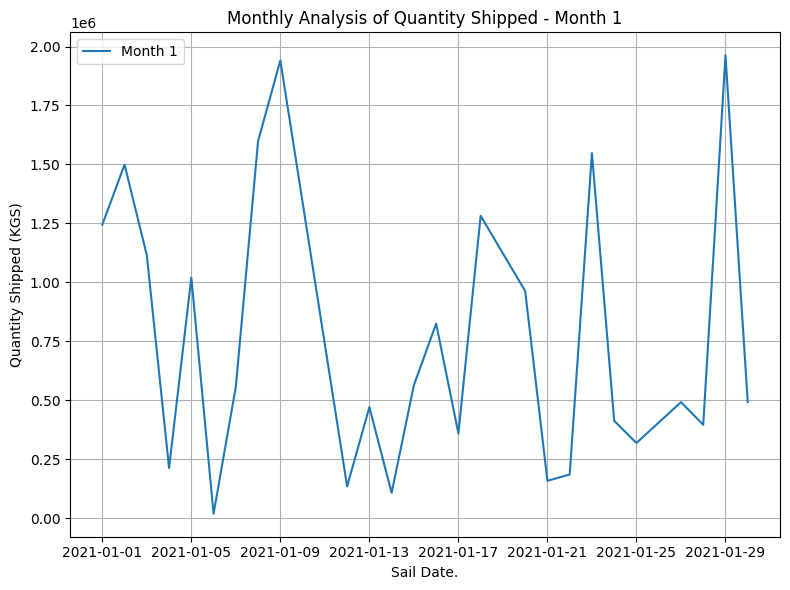

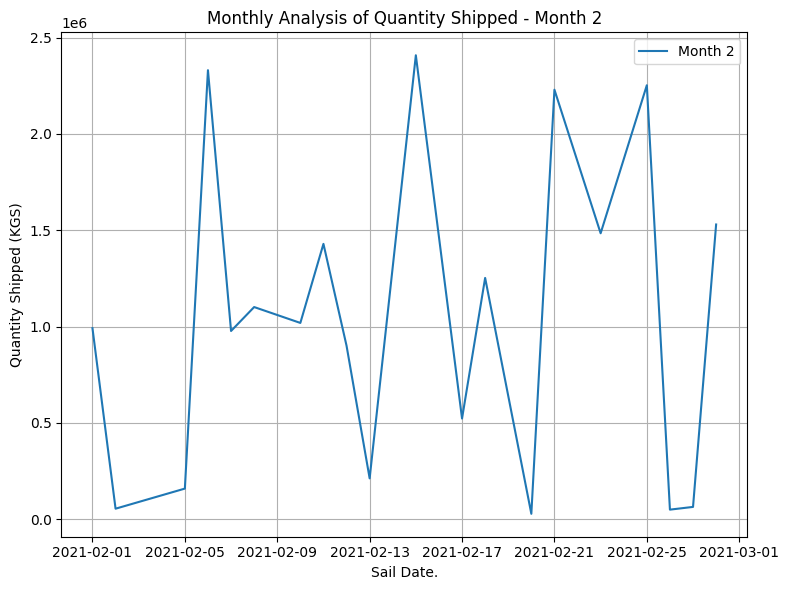

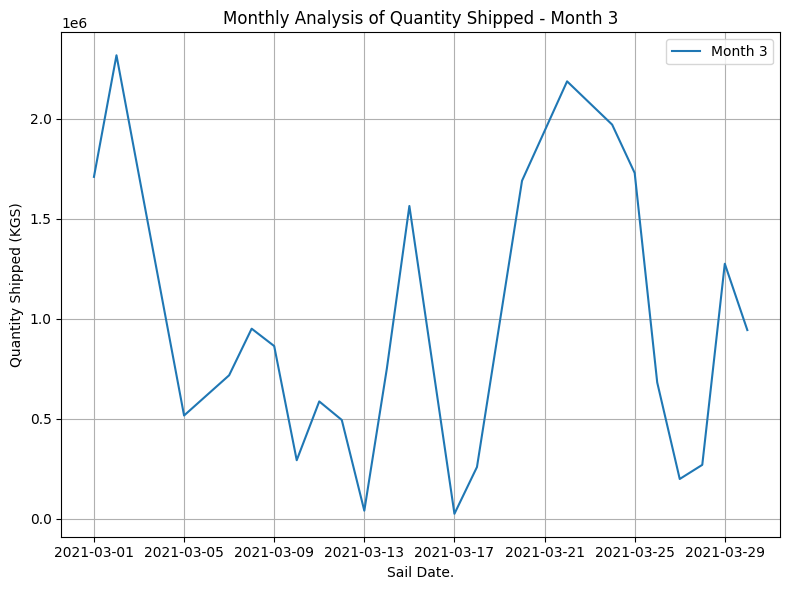

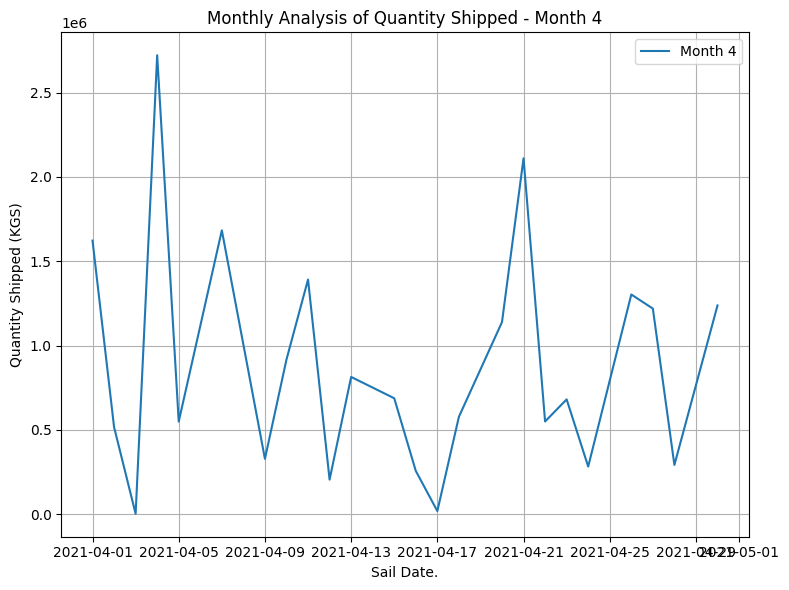

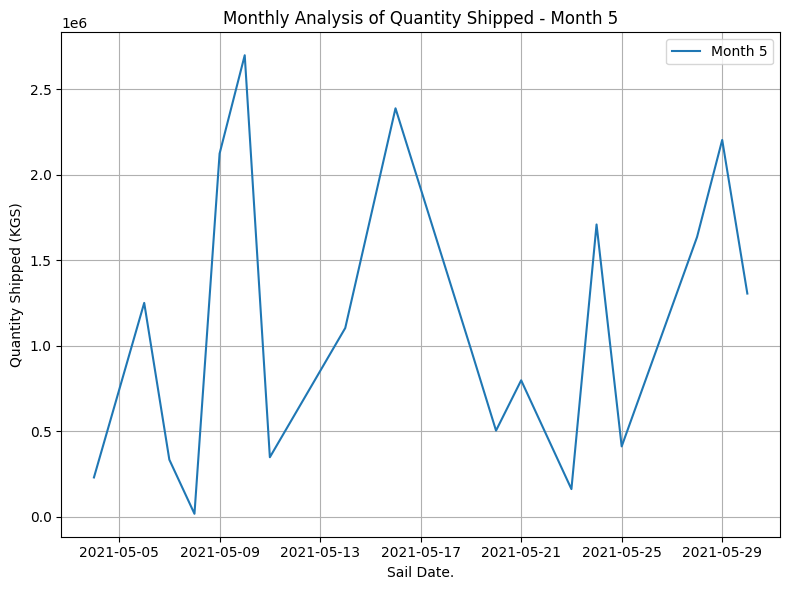

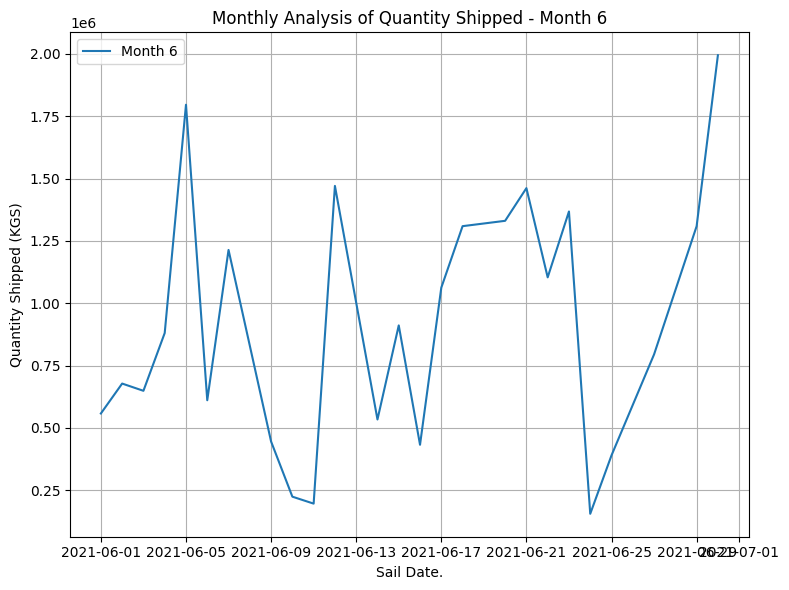

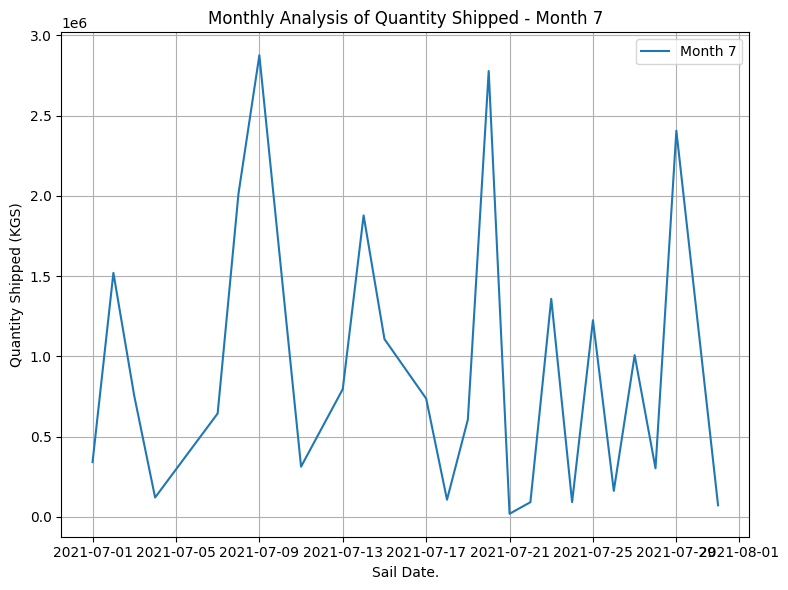

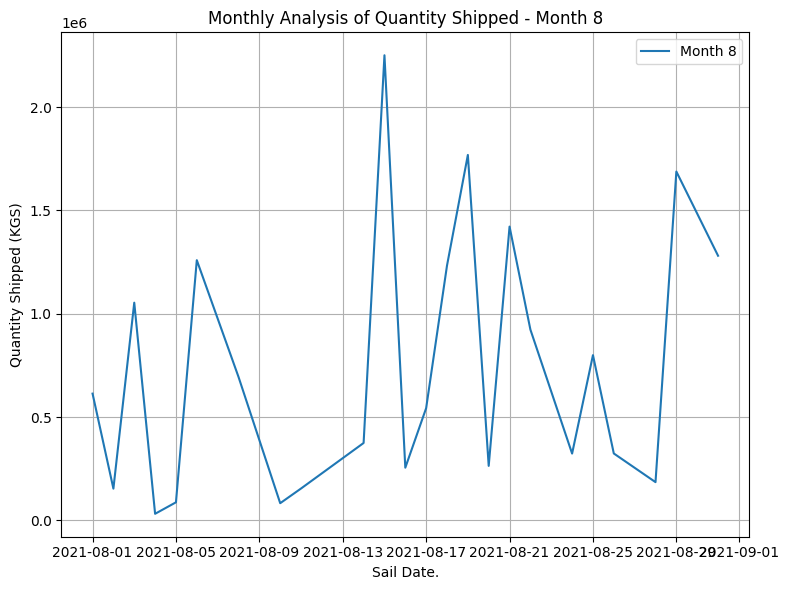

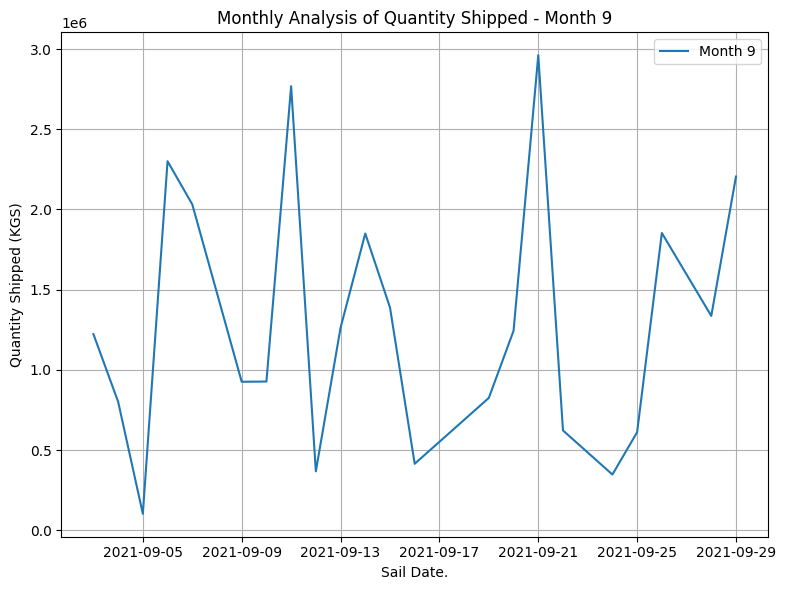

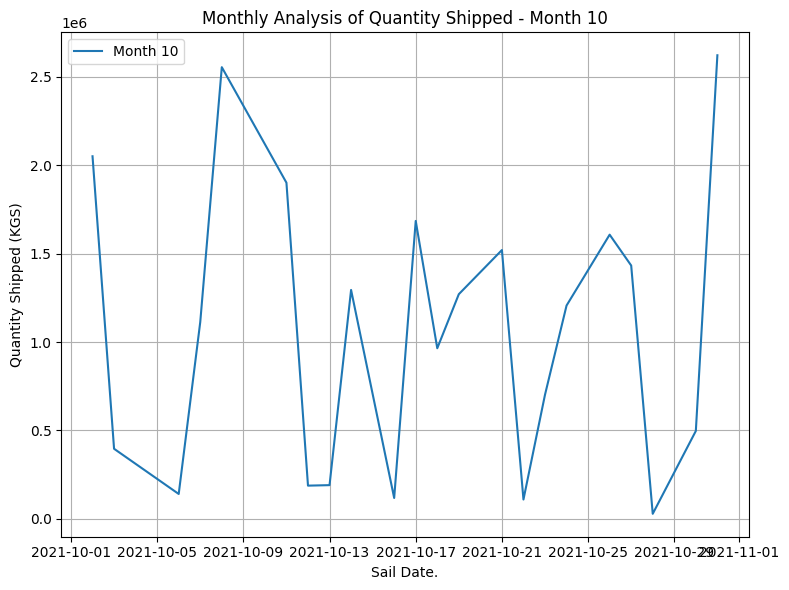

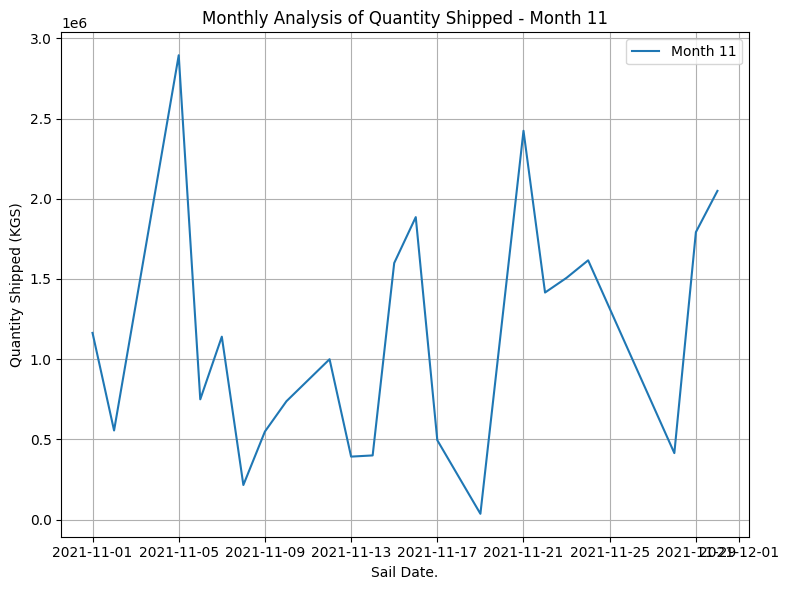

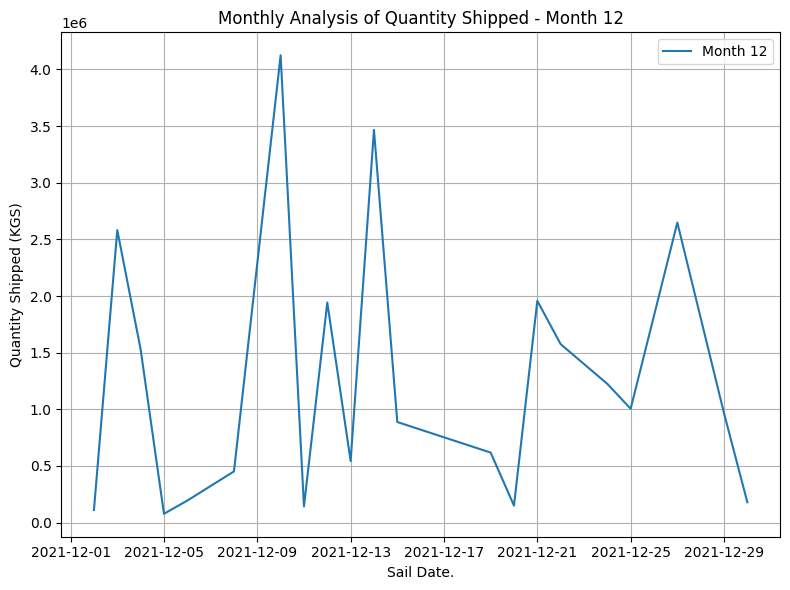

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if the column containing the date information is datetime
if 'Sail Date.' in daily_sales.columns:
    # Convert 'Sail Date.' to datetime with a specific format if needed
    try:
        daily_sales['Sail Date.'] = pd.to_datetime(daily_sales['Sail Date.'], format='%Y-%m-%d')
    except ValueError:
        print("Error: Unable to convert 'Sail Date.' to datetime. Check the date format.")

    # Check if conversion was successful
    if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
        # Extract year and month from the 'Sail Date.' column
        daily_sales['Month'] = daily_sales['Sail Date.'].dt.month

        # Iterate over each month
        for month in range(1, 13):
            # Filter the data for the current month
            month_data = daily_sales[daily_sales['Month'] == month]

            # Plotting
            plt.figure(figsize=(8, 6))
            plt.plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='', linestyle='-', label=f'Month {month}')
            plt.xlabel('Sail Date.')
            plt.ylabel('Quantity Shipped (KGS)')
            plt.title(f'Monthly Analysis of Quantity Shipped - Month {month}')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
    else:
        print("Error: 'Sail Date.' column could not be converted to datetime.")
else:
    print("Error: 'Sail Date.' column not found in the DataFrame.")


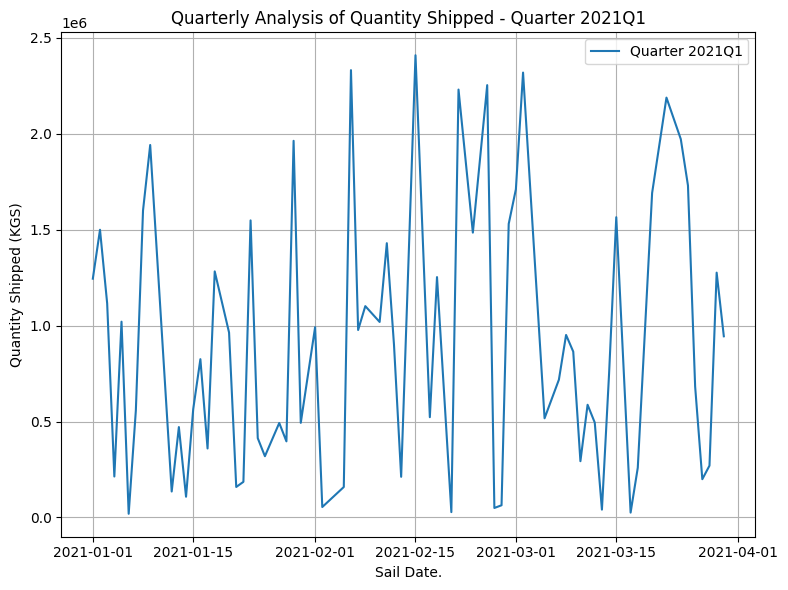

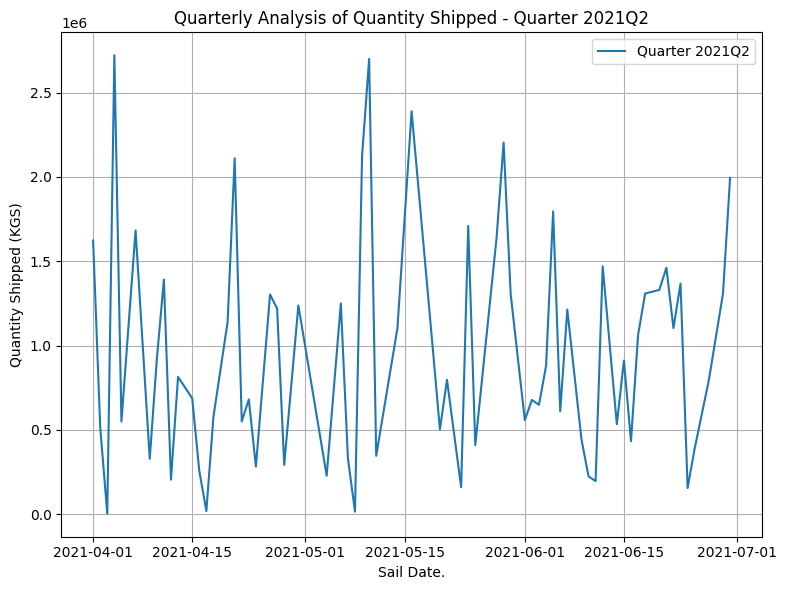

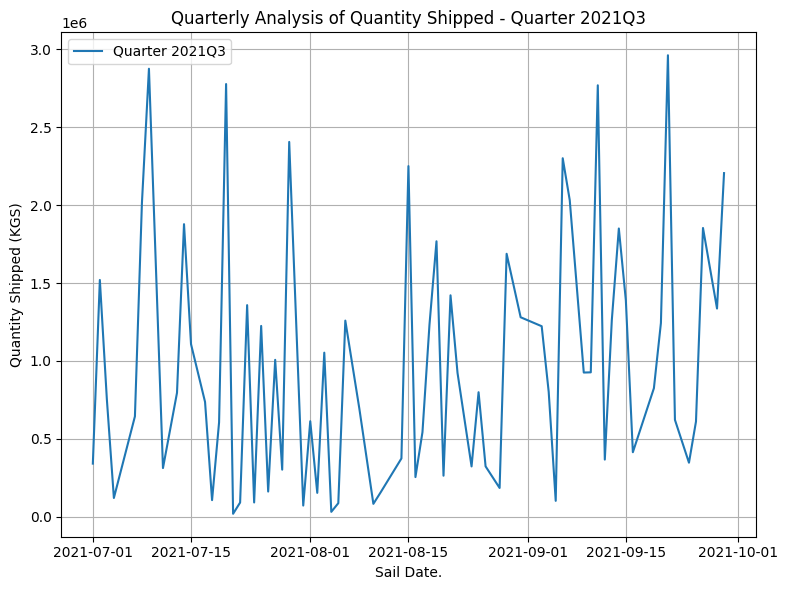

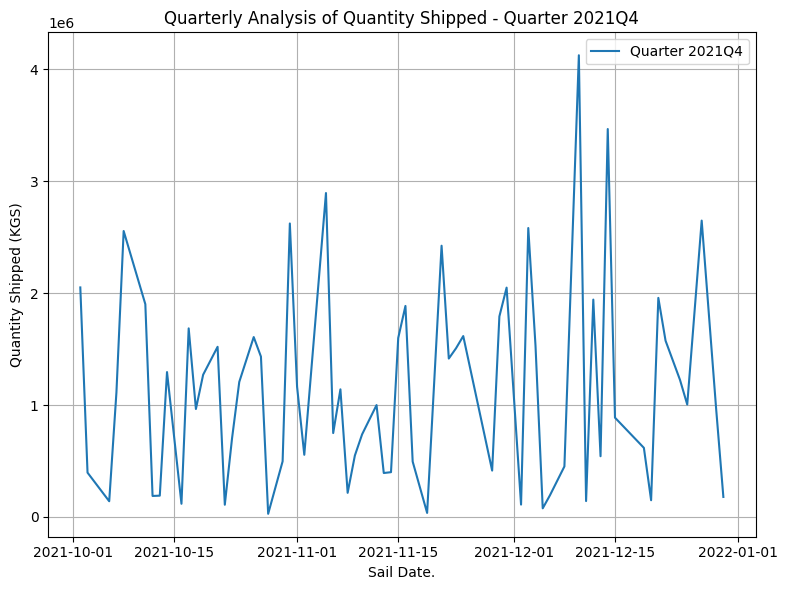

In [37]:


# Assuming daily_sales is your DataFrame containing the sales data
# Replace 'Sail Date.' with the actual name of your date column

# Check if the column containing the date information is datetime
if 'Sail Date.' in daily_sales.columns and pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
    # Group the data by quarters
    daily_sales['Quarter'] = daily_sales['Sail Date.'].dt.to_period('Q')

    # Iterate over each quarter
    for quarter in daily_sales['Quarter'].unique():
        # Filter the data for the current quarter
        quarter_data = daily_sales[daily_sales['Quarter'] == quarter]

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.plot(quarter_data['Sail Date.'], quarter_data['QTY.(KGS)'], marker='', linestyle='-', label=f'Quarter {quarter}')
        plt.xlabel('Sail Date.')
        plt.ylabel('Quantity Shipped (KGS)')
        plt.title(f'Quarterly Analysis of Quantity Shipped - Quarter {quarter}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


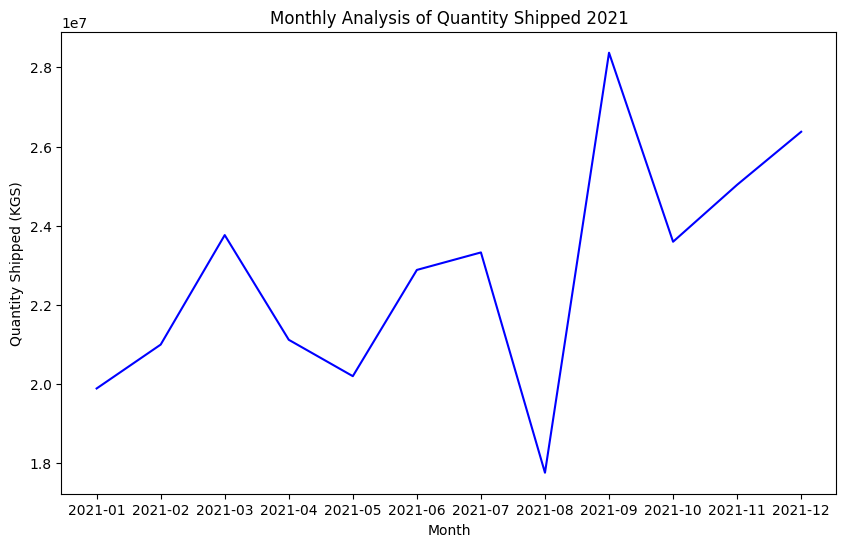

In [38]:
import matplotlib.pyplot as plt

# Assuming daily_sales is your DataFrame containing the sales data

# Check if the 'Sail Date.' column is datetime
if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
    # Extract year and month from the 'Sail Date.' column
    daily_sales['Month'] = daily_sales['Sail Date.'].dt.to_period('M')

    # Group the data by month and calculate the total quantity shipped for each month
    monthly_data = daily_sales.groupby('Month')['QTY.(KGS)'].sum()

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plotting each quarter with a different color
    plt.plot(monthly_data.index.astype(str), monthly_data.values, marker='', linestyle='-', color='blue')  # Plot all months in blue
    
    # Set labels and title
    plt.xlabel('Month')
    plt.ylabel('Quantity Shipped (KGS)')
    plt.title('Monthly Analysis of Quantity Shipped 2021')

    # Show the plot
    plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


<Figure size 1200x800 with 0 Axes>

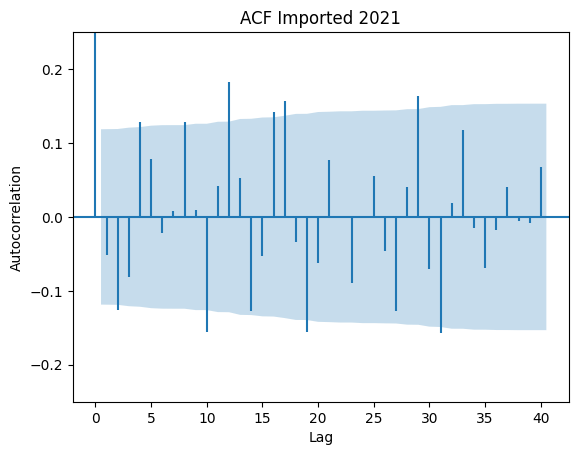

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming daily_sales is your DataFrame containing the sales data

# Specify the column name
sail_date_column = 'Sail Date.'

# Check if the specified column exists in the DataFrame
if sail_date_column in daily_sales.columns:
    # Attempt to convert 'Sail Date.' to datetime
    try:
        daily_sales[sail_date_column] = pd.to_datetime(daily_sales[sail_date_column])
    except ValueError as e:
        # Print the error message and problematic values
        print(f"Error: Unable to convert '{sail_date_column}' to datetime.")
        print("Problematic values:")
        problematic_values = daily_sales.loc[~daily_sales[sail_date_column].apply(lambda x: pd.to_datetime(str(x), errors='coerce')).notna(), sail_date_column]
        print(problematic_values)
    
    # Check if the column was successfully converted to datetime
    if pd.api.types.is_datetime64_any_dtype(daily_sales[sail_date_column]):
        # Set 'Sail Date.' column as index
        daily_sales.set_index(sail_date_column, inplace=True)
        
        # Increase figure size
        plt.figure(figsize=(12, 8))

        # Plot the autocorrelation function (ACF)
        plot_acf(daily_sales['QTY.(KGS)'], lags=40, marker=None)  # Adjust lags as needed
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title('ACF Imported 2021')
        
        # Set y-axis limits
        plt.ylim(-0.25, 0.25)
        
        plt.show()
    else:
        print(f"Error: '{sail_date_column}' column exists but could not be converted to datetime.")
else:
    print(f"Error: '{sail_date_column}' column not found in the DataFrame.")
